# Importing Netflix Movies & TV Shows Dataset

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv(r'netflix_titles.csv')

In [7]:
dataset.shape

(8807, 12)

In [12]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
print(dataset)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [4]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
genres = dataset.set_index('title').listed_in.str.split(
    ',',expand=True).stack().reset_index(level=1, drop=True)
print(genres)

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19323, dtype: object


# Countries with most Movies/Tv Shows

In [8]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
new_data = dataset['country'].value_counts().head(10)
new_data

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [12]:
movies = dataset[dataset['type'] == 'Movie']
tv_show = dataset[dataset['type'] == 'TV Show']
print(movies.shape, tv_show.shape)

(6131, 12) (2676, 12)


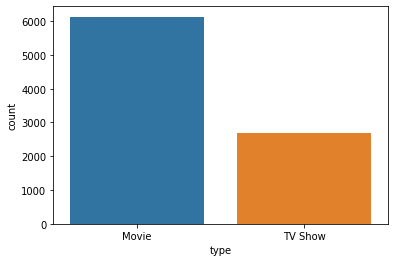

In [18]:
ax = sns.countplot(x = "type", data=dataset)

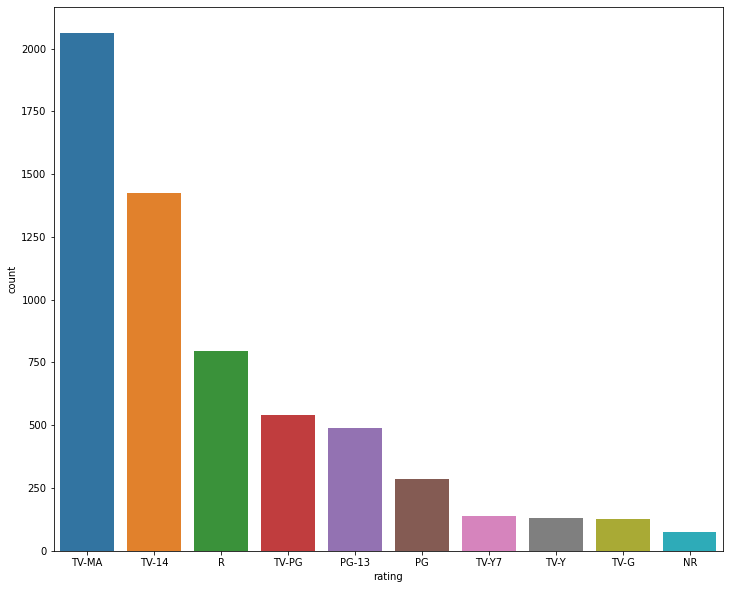

In [20]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = "rating", data=movies, order=movies['rating'].value_counts().index[0:10])

## Displaying only the show_id, type and titles from the dataset

In [5]:
import pandas as pd
data = pd.read_csv(r'netflix_titles.csv')
titles = pd.DataFrame(data, columns=['show_id', 'type', 'title'])
print(titles)

     show_id     type                  title
0         s1    Movie   Dick Johnson Is Dead
1         s2  TV Show          Blood & Water
2         s3  TV Show              Ganglands
3         s4  TV Show  Jailbirds New Orleans
4         s5  TV Show           Kota Factory
...      ...      ...                    ...
8802   s8803    Movie                 Zodiac
8803   s8804  TV Show            Zombie Dumb
8804   s8805    Movie             Zombieland
8805   s8806    Movie                   Zoom
8806   s8807    Movie                 Zubaan

[8807 rows x 3 columns]


In [6]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
print(dataset.tail(1))

     show_id   type   title     director  \
8806   s8807  Movie  Zubaan  Mozez Singh   

                                                   cast country  \
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India   

         date_added  release_year rating duration  \
8806  March 2, 2019          2015  TV-14  111 min   

                                           listed_in  \
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8806  A scrappy but poor boy worms his way into a ty...  


In [7]:
import numpy as np

# Dropping unnecessary columns from the dataset.

In [20]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
to_drop = ['duration',
          'cast',
          'rating',
          'release_year',
          'director',
          'description']

dataset.drop(to_drop, inplace=True, axis=1)
dataset.head()

,show_id,type,title,country,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."


Altering show_id as the unique identifier

In [19]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
to_drop = ['duration',
          'cast',
          'rating',
          'release_year',
          'director',
          'description']

dataset.drop(to_drop, inplace=True, axis=1)
dataset['show_id'].is_unique
dataset = dataset.set_index('show_id')
dataset.head()

,type,title,country,date_added,listed_in
show_id,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",Documentaries
s2,TV Show,Blood & Water,South Africa,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
s3,TV Show,Ganglands,NaN,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021","Docuseries, Reality TV"
s5,TV Show,Kota Factory,India,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."


In [81]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
to_drop = ['duration',
          'cast',
          'rating',
          'release_year',
          'director',
          'description']

dataset.drop(to_drop, inplace=True, axis=1)

dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.index = dataset.index + 1

dataset.head()

,show_id,type,title,country,date_added,listed_in
1,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",Documentaries
2,s2,TV Show,Blood & Water,South Africa,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
3,s5,TV Show,Kota Factory,India,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
4,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021","Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021","British TV Shows, Reality TV"


# Top 20 Genres on Netlfix

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

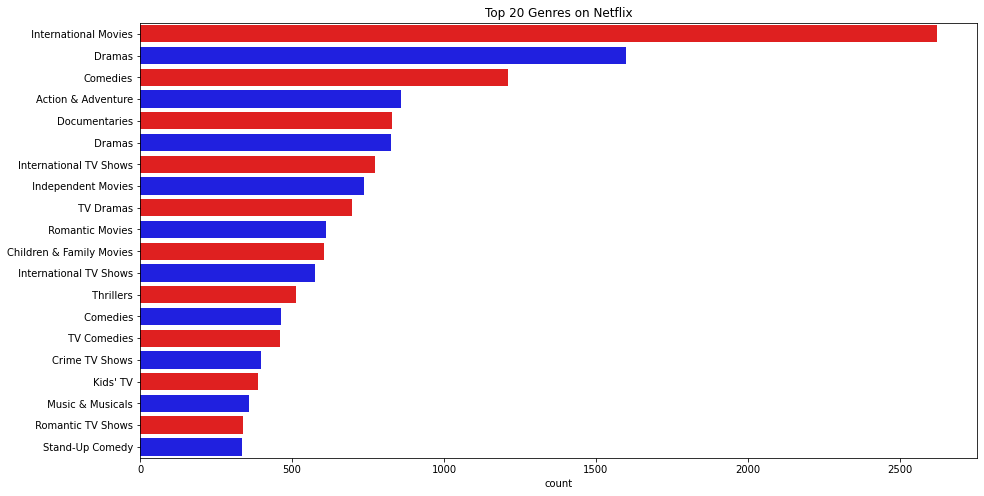

In [22]:
plt.figure(figsize=(15,8))
gen=sns.countplot(y=genres,order=genres.value_counts().index[:20],
                 palette=['Red','Blue'])
plt.title('Top 20 Genres on Netflix')

# Inserting 2 CSV files, movies and their corresponding ratings

In [6]:
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title', 'year', 'genre'])
ratings=pd.DataFrame({'Title':imdb_titles.title,
                     'Release Year':imdb_titles.year,
                     'Rating': imdb_ratings.weighted_average_vote,
                     'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)
ratings.shape

FileNotFoundError: [Errno 2] No such file or directory: 'IMDb ratings.csv'

In [31]:
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
ratings=pd.DataFrame({'Title':imdb_titles.title,
                     'Release Year':imdb_titles.year,
                     'Rating': imdb_ratings.weighted_average_vote,
                     'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)
ratings.dropna()
print(ratings)

                                Title Release Year  Rating  \
0                          Miss Jerry         1894     5.9   
1         The Story of the Kelly Gang         1906     6.1   
2                      Den sorte drøm         1911     5.8   
3                           Cleopatra         1912     5.2   
4                           L'Inferno         1911     7.0   
...                               ...          ...     ...   
85850                         Le lion         2020     5.3   
85851  De Beentjes van Sint-Hildegard         2020     7.7   
85852       Padmavyuhathile Abhimanyu         2019     7.9   
85853               Sokagin Çocuklari         2019     6.4   
85854      La vida sense la Sara Amat         2019     6.7   

                           Genre  
0                        Romance  
1        Biography, Crime, Drama  
2                          Drama  
3                 Drama, History  
4      Adventure, Drama, Fantasy  
...                          ...  
85850     

In [32]:
ratings.dropna()
data_joined = ratings.merge(dataset, left_on='Title', right_on='title', how='inner')
data_joined = data_joined.sort_values(by='rating', ascending=False)
data_joined

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2292,Sex Doll,2016,4.5,Thriller,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
92,Sahara,1943,7.5,"Action, Drama, War",s5492,Movie,Sahara,Pierre Coré,"Robert Naylor, Angela Galuppo, Daniel Brochu, ...","France, Canada","May 12, 2017",2017,TV-Y7,86 min,Children & Family Movies,When his new love is captured by an evil snake...
34,Animal Crackers,1930,7.5,"Comedy, Musical",s2208,Movie,Animal Crackers,"Tony Bancroft, Scott Christian Sava","Emily Blunt, John Krasinski, Ian McKellen, Dan...","China, Spain, South Korea, United States","July 24, 2020",2020,TV-Y7,106 min,"Children & Family Movies, Comedies",Enchanted animal crackers turn Owen into whate...
630,City of Ghosts,2002,6.0,"Crime, Drama, Thriller",s1232,TV Show,City of Ghosts,NaN,"August Nuñez, Blue Chapman, Kirikou S'hai Muld...",United States,"March 5, 2021",2021,TV-Y7,1 Season,Kids' TV,Meet the Ghost Club! Their adventures take the...
35,Animal Crackers,2017,5.8,"Animation, Adventure, Comedy",s2208,Movie,Animal Crackers,"Tony Bancroft, Scott Christian Sava","Emily Blunt, John Krasinski, Ian McKellen, Dan...","China, Spain, South Korea, United States","July 24, 2020",2020,TV-Y7,106 min,"Children & Family Movies, Comedies",Enchanted animal crackers turn Owen into whate...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,My Fair Lady,1964,7.8,"Drama, Family, Musical",s1127,Movie,My Fair Lady,George Cukor,"Audrey Hepburn, Rex Harrison, Stanley Holloway...",United States,"April 1, 2021",1964,G,173 min,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...
2710,Pup Star: World Tour,2018,4.3,"Comedy, Family, Musical",s4874,Movie,Pup Star: World Tour,Robert Vince,"Jed Ress, Makenzie Moss, Denisse Ojeda, Reggie...","Canada, Japan, United States","May 5, 2018",2018,G,87 min,"Children & Family Movies, Comedies, Music & Mu...",Talented pooches from around the world compete...
552,Tarzan,1999,7.3,"Animation, Adventure, Family",s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,"June 23, 2018",1999,G,89 min,Children & Family Movies,"After being shipwrecked off the African coast,..."
402,Canvas,2006,6.5,Drama,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,G,9 min,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru..."


# Countries with the highest rated content 

In [28]:
country_count = data_joined['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
highestratedcountries=country_count[0:11]
highestratedcountries

,country
United States,865
India,718
United Kingdom,119
Canada,57
Philippines,50
Spain,41
Indonesia,38
South Korea,38
France,37
Nigeria,31


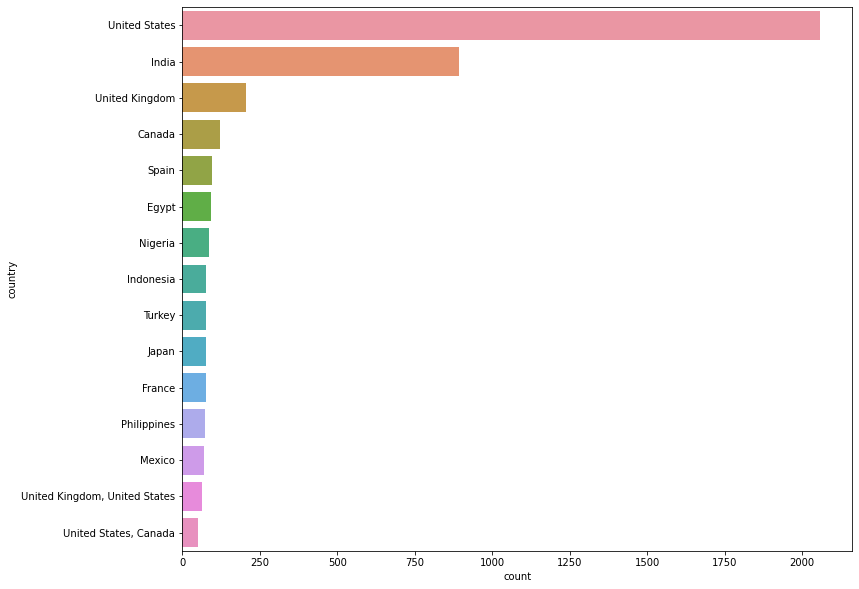

In [34]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="country", data=movies, order=movies['country'].value_counts().index[0:15])

In [25]:
import pandas as pd
dataset = pd.read_csv(r'netflix_titles.csv')
to_drop = ['duration',
          'cast',
          'rating',
          'date_added',
          'director',
          'description']
dataset.drop(to_drop, inplace=True, axis=1)

dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.index = dataset.index + 1

dataset.head()


,show_id,type,title,country,release_year,listed_in
1,s1,Movie,Dick Johnson Is Dead,United States,2020,Documentaries
2,s2,TV Show,Blood & Water,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
3,s5,TV Show,Kota Factory,India,2021,"International TV Shows, Romantic TV Shows, TV ..."
4,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,United Kingdom,2021,"British TV Shows, Reality TV"


In [20]:
import pandas as pd
import numpy as np
from ast import literal_eval

md = pd.read_csv(r'movies_metadata.csv')

md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


In [135]:
#Student ID: c00236670, c00237335
#Student Name: Long Ye, Rachel Doogue
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from ast import literal_eval
import statsmodels.formula.api as smf

import warnings; warnings.simplefilter('ignore')

md = pd.read_csv(r'movies_metadata.csv')

#Sets the year from release date e.g. 21-02-2021 turns into 2021
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

md[["day", "month", "year"]] = md["release_date"].str.split("-", expand = True)
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

#print(md[['release_date','year','day','month']])

s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genreOfmd = md.drop('genres', axis=1).join(s)

#Check the genre ratings of a specified year
def check_Genre(year):    
    #Open the genre list file
    GT = pd.read_csv(r'GenreTable.csv')
    
    #Check the rows
    for i, row in GT.iterrows():
        #Assign row value to G (Genre)
        G = row['Genres'] 
        newTable = get_table(G,year)
        
        mean = newTable['wr'].mean()
        

        #Apply the mean weighted rating to the row of the G (Genre)
        #Checks all the genre by row
        GT.loc[i, 'Mean'] = mean


    #Sort the values of the file by highest mean to lowest
    GT = GT.sort_values('Mean', ascending=False).head(250)
    print(GT)

#Table calculation part for the specified year and genre        
def get_table(genre,year, percentile=0.85):
    
    #Assign data frame with the sorted values of genre from md
    dataFrame = genreOfmd[(genreOfmd['genre'] == genre)]
    
    #Checks if values are empty
    #If not empty then assign type int to the numbers
    countRating = dataFrame[dataFrame['vote_count'].notnull()]['vote_count'].astype('int')
    averageRating = dataFrame[dataFrame['vote_average'].notnull()]['vote_average'].astype('int')
    
    #Getting the mean rating and quantile of this genre
    C = averageRating.mean()
    m = countRating.quantile(percentile)
    
    #Qualified is the new table
    #Checks all vote > mean and not null
    #With columns title year voteC voteA
    newTable = dataFrame[(dataFrame['year'] == year) &
                   (dataFrame['vote_count'] >= m)  & 
                   (dataFrame['vote_count'].notnull()) & 
                   (dataFrame['vote_average'].notnull())][['title', 
                                                           'year', 
                                                           'month',
                                                           'vote_count', 
                                                           'genre', 
                                                           'vote_average']]
    
    #Assigning the values to int type
    newTable['vote_count'] = newTable['vote_count'].astype('int')
    newTable['vote_average'] = newTable['vote_average'].astype('int')
    
    #Create wr (weighted rating) column and sort by it
    newTable['wr'] = newTable.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    newTable = newTable.sort_values('wr', ascending=False).head(250)
    
    #Return the top 5 movies of this genre for the specified year
    #return newTable.head()
    return newTable

def show_mean(genre,year):
    
    newTable = get_table(genre,year)
    
    #Getting the mean of the weighted rating
    wr = newTable['wr']
    result = wr.mean()
    return result

def show_linear_regression(genre,year):
    
    newTable = get_table(genre,year)
    
    newTable['month'] = newTable['month'].astype('int')
    
    model = smf.ols('month ~ wr', data=newTable)
    model = model.fit()
    
    # Predict values
    sales_pred = model.predict()

    #Assigning the data
    plt.figure(figsize=(12, 6))
    plt.plot(newTable['month'], newTable['wr'], 'o')           
     
    #Creating the line
    m, b = np.polyfit(newTable['month'], newTable['wr'], 1)
    plt.plot(newTable['month'], m * newTable['month'] + b)
    
    #Labelling the data
    plt.xlabel('month')
    plt.ylabel('Weighted Rating')
    plt.title('Rating of genre ' + genre + ' of year ' + year)
    
    #Displaying the graph
    plt.show()

def show_cluster(genre,year):
    
    newTable = get_table(genre,year)
    
    newTable['month'] = newTable['month'].astype('int')
    
    plt.scatter(newTable['month'],newTable['wr'])
    plt.xlim(-0,12)
    plt.ylim(-0,12)
    plt.show()
    
#Genre and year to filter
genre = 'Romance'
year = '2013'

#Works with inputted year---
check_Genre(year)

#Works with inputted year and genre---
#get_table(genre,year).head(5)
#print(show_mean(genre,year))
#show_linear_regression(genre,year)
#show_cluster(genre,year)



             Genres      Mean
8       Documentary  6.318019
6           History  6.296937
16            Music  6.292849
4         Animation  6.203076
1             Drama  5.991933
9           Romance  5.912952
5   Science Fiction  5.863523
10        Adventure  5.854956
15              War  5.852141
13          Mystery  5.760828
14           Family  5.745462
2            Comedy  5.686913
11            Crime  5.671544
12          Fantasy  5.657859
0            Action  5.650920
3          Thriller  5.641119
7            Horror  5.233519
17          Western  5.144408
